In [1]:
#Importing the usual libraries.
import numpy as np
import tensorly as tl
import seaborn as sns
import matplotlib.pyplot as plt

#Importing time functions to measure the processing time.
from time import process_time
from time import process_time_ns

#Setting style options.
sns.set()
np.set_printoptions(3)
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}

div.output_area {
    width: 55%;
}

"""

HTML('<style>{}</style>'.format(CSS))

Using numpy backend.


The following packages are used in this notebook:

- `numpy 1.18.1`
- `tensorly 0.4.3`
- `seaborn 0.10.0`

# Problem 1

Generate $\mathbf{X}$ = $\mathbf{A} \diamond \mathbf{B} \in \mathbb{R}^{I×R}$ , for randomly chosen $\mathbf{A} \in \mathbb{R}^{I×R}$ and $\mathbf{B} \in \mathbb{R}^{I×R}$.Compute the left pseudo-inverse of X and obtain a graph that shows the run time vs. number of rows (I) for the following methods:

(a)Method 1: numpy.linalg.pinv($\mathbf{X}$) = numpy.linalg.pinv($\mathbf{A} \diamond \mathbf{B}$)  

(b)Method 2: $\mathbf{X}^{\dagger} = (\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T} = [(\mathbf{A} \diamond \mathbf{B})^{T} \mathbf{A} \diamond \mathbf{B}]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$

(c)Method 3: $\mathbf{X}^{\dagger} = [(\mathbf{A} \diamond \mathbf{B})^{T} \mathbf{A} \diamond \mathbf{B}]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T} = [(\mathbf{A}^{T} \mathbf{A}) \odot (\mathbf{B}^{T} \mathbf{B})]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$

Note: Consider the range of values $I \in$ {2, 4, 8, 16, 32, 64, 128, 256} and plot the curves for $R = 2$ and $R = 4$.

<font color='red'>Solution:</font>

In [10]:
I = np.array([2,4,8,16,32,64,128,256])
Size = len(I)

In [11]:
#For the first method and for R = 2:

R,elapsed_time01_R2 = 2,np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(I[i],R)
        B = np.random.randn(I[i],R)
        
        current_time = process_time_ns()
        np.linalg.pinv(tl.tenalg.khatri_rao([A,B]))
        elapsed_time01_R2[i] = elapsed_time01_R2[i] + (process_time_ns() - current_time)
        
elapsed_time01_R2 = elapsed_time01_R2/1000

In [12]:
#For the first method and for R = 4:

R,elapsed_time01_R4 = 4,np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(I[i],R)
        B = np.random.randn(I[i],R)
    
        current_time = process_time_ns()
        np.linalg.pinv(tl.tenalg.khatri_rao([A,B]))
        elapsed_time01_R4[i] = elapsed_time01_R4[i] + (process_time_ns() - current_time)
        
elapsed_time01_R4 = elapsed_time01_R4/1000

In [13]:
#For the second method and for R = 2:

R,elapsed_time02_R2 = 2,np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(I[i],R)
        B = np.random.randn(I[i],R)
        
        current_time = process_time_ns()
        (np.linalg.inv(((tl.tenalg.khatri_rao([A,B])).T)@(tl.tenalg.khatri_rao([A,B]))))@((tl.tenalg.khatri_rao([A,B])).T)
        elapsed_time02_R2[i] = elapsed_time02_R2[i] + (process_time_ns() - current_time)
        
elapsed_time02_R2 = elapsed_time02_R2/1000

In [14]:
#For the second method and for R = 4:

R,elapsed_time02_R4 = 4,np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(I[i],R)
        B = np.random.randn(I[i],R)
     
        current_time = process_time_ns()
        (np.linalg.inv(((tl.tenalg.khatri_rao([A,B])).T)@(tl.tenalg.khatri_rao([A,B]))))@((tl.tenalg.khatri_rao([A,B])).T)
        elapsed_time02_R4[i] = elapsed_time02_R4[i] + (process_time_ns() - current_time)
        
elapsed_time02_R4 = elapsed_time02_R4/1000

In [15]:
#For the third method and for R = 2:

R,elapsed_time03_R2 = 2,np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(I[i],R)
        B = np.random.randn(I[i],R)
        
        current_time = process_time_ns()
        np.linalg.inv(((A.T)@A)*((B.T)@B))@((tl.tenalg.khatri_rao([A,B])).T)
        elapsed_time03_R2[i] = elapsed_time03_R2[i] + (process_time_ns() - current_time)
        
elapsed_time03_R2 = elapsed_time03_R2/1000

In [16]:
#For the third method and for R = 4:

R,elapsed_time03_R4 = 4,np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(I[i],R)
        B = np.random.randn(I[i],R)
        
        current_time = process_time_ns()
        np.linalg.inv(((A.T)@A)*((B.T)@B))@((tl.tenalg.khatri_rao([A,B])).T)
        elapsed_time03_R4[i] = elapsed_time03_R4[i] + (process_time_ns() - current_time)
        
elapsed_time03_R4 = elapsed_time03_R4/1000

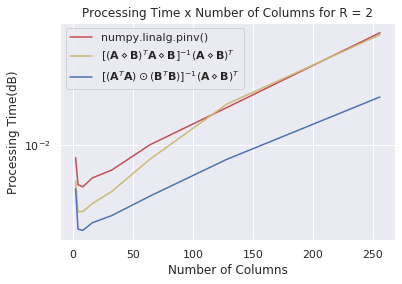

In [17]:
plt.figure()
plt.semilogy(I,10*elapsed_time01_R2*10**-9,'r', label = 'numpy.linalg.pinv()')
plt.semilogy(I,10*elapsed_time02_R2*10**-9,'y', label = '$[(\mathbf{A} \diamond \mathbf{B})^{T} \mathbf{A} \diamond \mathbf{B}]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$')
plt.semilogy(I,10*elapsed_time03_R2*10**-9,'b', label = '$[(\mathbf{A}^{T} \mathbf{A}) \odot (\mathbf{B}^{T} \mathbf{B})]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$')
plt.title('Processing Time x Number of Columns for R = 2')
plt.xlabel('Number of Columns')
plt.ylabel('Processing Time(dB)')
plt.legend()
plt.show()

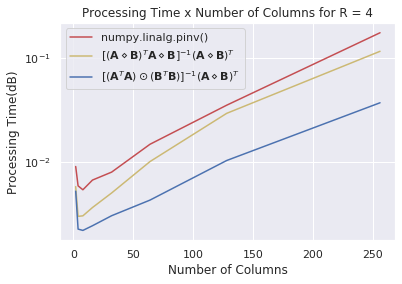

In [18]:
plt.figure()
plt.semilogy(I,10*elapsed_time01_R4*10**-9,'r', label = 'numpy.linalg.pinv()')
plt.semilogy(I,10*elapsed_time02_R4*10**-9,'y', label = '$[(\mathbf{A} \diamond \mathbf{B})^{T} \mathbf{A} \diamond \mathbf{B}]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$')
plt.semilogy(I,10*elapsed_time03_R4*10**-9,'b', label = '$[(\mathbf{A}^{T} \mathbf{A}) \odot (\mathbf{B}^{T} \mathbf{B})]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$')
plt.title('Processing Time x Number of Columns for R = 4')
plt.xlabel('Number of Columns')
plt.ylabel('Processing Time(dB)')
plt.legend()
plt.show()

As expected the last method was a lot faster than the other two. However, to use the second and third methods we need to know the $A \diamond B$ that will generate our signal X. This can be easily done using the algorithm for Least-Squares Khatri-Rao Factorization and obtaining the stimations of A and B. Also the changing in the value of R results in an increase of processing time once there will more numerical data to be processed, but still nothing to be worried about.

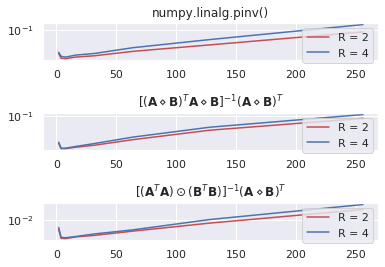

In [19]:
plt.figure()
ax1 = plt.subplot(511)
plt.title('numpy.linalg.pinv()')
ax1.semilogy(I,10*elapsed_time01_R2*10**-9,'r', label = 'R = 2')
ax1.semilogy(I,10*elapsed_time01_R4*10**-9,'b', label = 'R = 4')
plt.legend()

ax2 = plt.subplot(513)
plt.title('$[(\mathbf{A} \diamond \mathbf{B})^{T} \mathbf{A} \diamond \mathbf{B}]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$')
ax2.semilogy(I,10*elapsed_time02_R2*10**-9,'r', label = 'R = 2')
ax2.semilogy(I,10*elapsed_time02_R4*10**-9,'b', label = 'R = 4')
plt.legend()

ax3 = plt.subplot(515)
plt.title('$[(\mathbf{A}^{T} \mathbf{A}) \odot (\mathbf{B}^{T} \mathbf{B})]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$')
ax3.semilogy(I,10*elapsed_time03_R2*10**-9,'r', label = 'R = 2')
ax3.semilogy(I,10*elapsed_time03_R4*10**-9,'b', label = 'R = 4')
plt.legend()

plt.show()

In this plot is possible to see in more details how the change of the rank of the matrices A and B impact in the processing time.

# Problem 2

Generate $\mathbf{X} = \diamond^{N}_{i = 1} \mathbf{A}_{(n)} = \mathbf{A_{(1)} ... \mathbf{A}_{(N)}}$, where every $\mathbf{A}_{(n)}$ has dimensions 4×2 $\forall n \in N$. Evaluate the run time associated with the computation of the Khatri-Rao product as a function of the number N of matrices for the above methods.

Note: Consider the range of values $N \in$ {2, 4, 6, 8, 10}.

<font color='red'>Solution:</font>

In [3]:
N = np.array([2,4,6,8,10])
Size = len(N)

In [7]:
#For the first method :

elapsed_time04_R2 = np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(4,2)
        A_list = np.zeros([N[i],4,2])
        A_list[:,:,:] = A
        current_time = process_time_ns()
        np.linalg.pinv(tl.tenalg.khatri_rao(A_list))
        elapsed_time04_R2[i] = elapsed_time04_R2[i] + (process_time_ns() - current_time)
        
elapsed_time04_R2 = elapsed_time04_R2/1000

In [6]:
#For the second method :

elapsed_time05_R2 = np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(4,2)
        A_list = np.zeros([N[i],4,2])
        A_list[:,:,:] = A
        current_time = process_time_ns()
        (np.linalg.inv(((tl.tenalg.khatri_rao(A_list)).T)@(tl.tenalg.khatri_rao(A_list))))@((tl.tenalg.khatri_rao(A_list)).T)
        elapsed_time05_R2[i] = elapsed_time05_R2[i] + (process_time_ns() - current_time)
        
elapsed_time05_R2 = elapsed_time05_R2/1000

In [8]:
#For the third method :

elapsed_time06_R2 = np.zeros([Size])
for k in range(0,1000):
    for i in range(0,Size):
        A = np.random.randn(4,2)
        A_list = np.zeros([N[i],4,2])
        A_list_T = np.zeros([N[i],2,4])
        A_list[:,:,:] = A
        A_list_T[:,:,:] = A.T
        current_time = process_time_ns()
        np.linalg.inv(((A_list_T)@A_list)*((A_list_T)@A_list))@((tl.tenalg.khatri_rao(A_list)).T)
        elapsed_time06_R2[i] = elapsed_time06_R2[i] + (process_time_ns() - current_time)
        
elapsed_time06_R2 = elapsed_time06_R2/1000

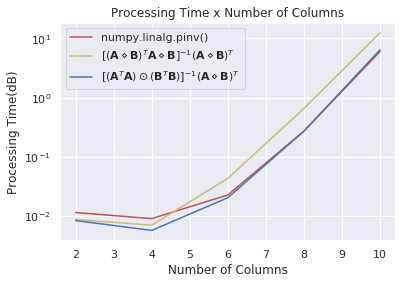

In [9]:
plt.figure()
plt.semilogy(N,10*elapsed_time04_R2*10**-9,'r', label = 'numpy.linalg.pinv()')
plt.semilogy(N,10*elapsed_time05_R2*10**-9,'y', label = '$[(\mathbf{A} \diamond \mathbf{B})^{T} \mathbf{A} \diamond \mathbf{B}]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$')
plt.semilogy(N,10*elapsed_time06_R2*10**-9,'b', label = '$[(\mathbf{A}^{T} \mathbf{A}) \odot (\mathbf{B}^{T} \mathbf{B})]^{-1} (\mathbf{A} \diamond \mathbf{B})^{T}$')
plt.title('Processing Time x Number of Columns')
plt.xlabel('Number of Columns')
plt.ylabel('Processing Time(dB)')
plt.legend()
plt.show()

## About this notebook

**Author**: Kenneth B. dos A. Benício

**Uptaded on**: 2020-03-17